In [8]:
%load_ext autoreload
%autoreload 2

In [45]:
import utils
import streak_cut
import numpy as np
import astropy.io.fits as fits
import os
from tqdm import tqdm
from datasets import create_dataset_strips
import matplotlib.pyplot as plt
import pandas as pd




In [34]:
create_dataset_strips(32)

Creating strips: 100%|██████████| 245/245 [00:30<00:00,  8.06it/s]


In [86]:
def get_strip_file_name(row: pd.Series):
    return f"{row['file_name']}_strip_{row['extension']}_{row['ID']}.npy"


def get_strip_file_path(row: pd.Series):
    filename = f"{row['file_name']}_strip_{row['extension']}_{row['ID']}.npy"
    return os.path.join(utils.get_project_root(), 'datasets', 'strips_181024',filename)

In [ ]:
good_data = utils.read_streaks_csv()

# Do basic data analysis
max_img_height = 0
max_img_width = 0
# min img initialized to python max value
min_img_height = 5000
min_img_width = 5000
flattened_data = np.array([])
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    img_height, img_width = img.shape
    if img_height > max_img_height:
        max_img_height = img_height
    if img_width > max_img_width:
        max_img_width = img_width
    if img_height < min_img_height:
        min_img_height = img_height
    if img_width < min_img_width:
        min_img_width = img_width
    # Flatten the image
    flattened_data = np.concatenate((flattened_data, img.flatten()))

Mean: 3929.329476288207, median:724.0, std: 4910.77228288901, min: 0.0, max: 65535.0
Image height; min: 32, max: 32
Image width; min: 207, max: 4408


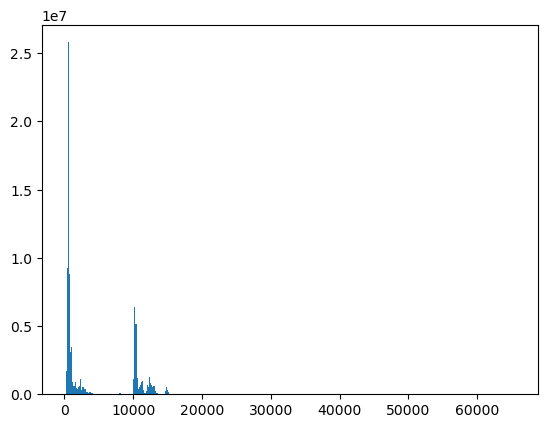

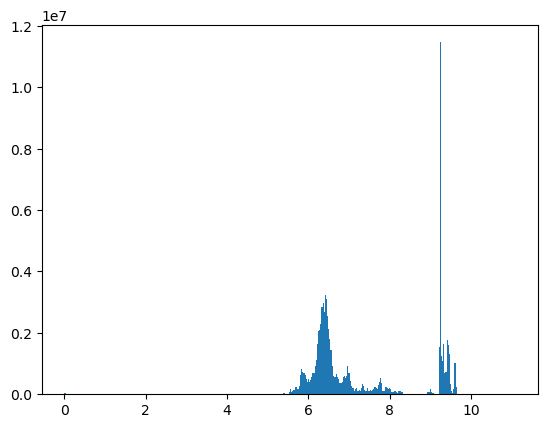

In [80]:
# Calculate the mean, median, std, min, max of the flattened data
mean = np.mean(flattened_data)
median = np.median(flattened_data)
std = np.std(flattened_data)
min_val = np.min(flattened_data)
max_val = np.max(flattened_data)
print(f"Mean: {mean}, median:{median}, std: {std}, min: {min_val}, max: {max_val}")

print(f"Image height; min: {min_img_height}, max: {max_img_height}")
print(f"Image width; min: {min_img_width}, max: {max_img_width}")

# Show a histogram of the data as well as the log of the data
plt.hist(flattened_data, bins=400)
plt.show()
plt.hist(np.log(flattened_data + 1), bins=400)
plt.show()


In [78]:
# Put the number of pixels with value higher than 20000 in a flattened array
big_values = np.array([])
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    big_values = np.concatenate((big_values, img[(img > 20000) & (img < 65535)]))

100%|██████████| 1185/1185 [00:00<00:00, 3909.53it/s]


21919


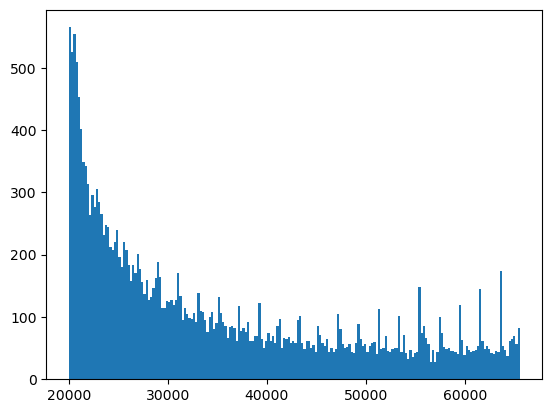

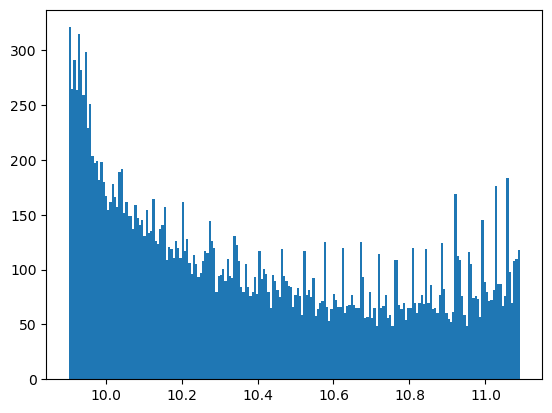

In [79]:
print(big_values.shape[0])
# Show a histogram of the data as well as the log of the data
plt.hist(big_values, bins=200)
plt.show()
plt.hist(np.log(big_values + 1), bins=200)
plt.show()


100%|██████████| 1185/1185 [00:00<00:00, 4732.30it/s]


Mean: 2259.7400843881856, median: 2061.0, std: 955.3266205090055, min: 207.0, max: 4408.0


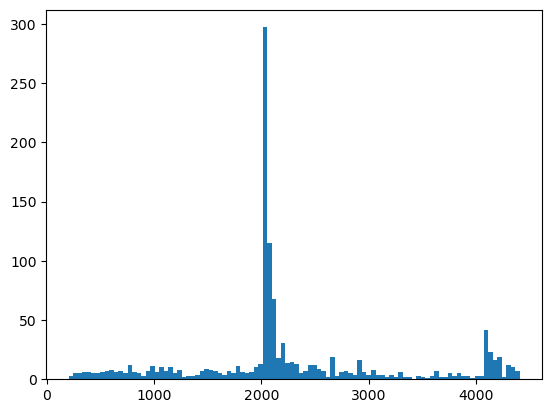

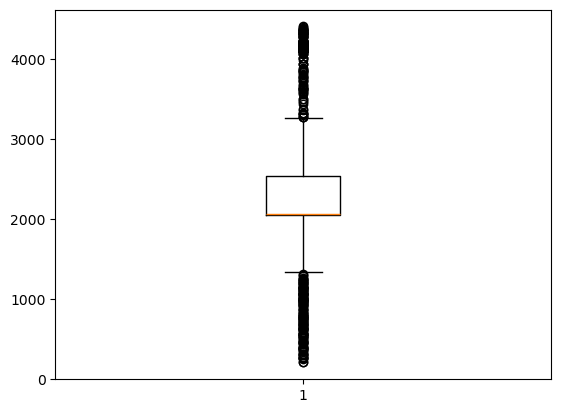

In [84]:
# Show image width distribution
widths = np.zeros((good_data.shape[0], 1))
for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    img = np.load(get_strip_file_path(row))
    widths[idx] = img.shape[1]

print(f"Mean: {np.mean(widths)}, median: {np.median(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
plt.hist(widths, bins=100)
plt.show()
plt.boxplot(widths)
plt.show()

In [83]:
# Load one image
img = np.load(get_strip_file_path(good_data.iloc[0]))
img.dtype

dtype('uint16')

In [93]:
def create_auxiliary_data_csv():
    good_data = utils.read_streaks_csv().iloc[0:1]
    for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
        with fits.open(utils.get_fits_path(row['file_name'])) as hdul:
            header = hdul[0].header
            for key in header.keys():
                print(key, header[key])
        

In [94]:
create_auxiliary_data_csv()

  0%|          | 0/1 [00:00<?, ?it/s]

SIMPLE True
BITPIX 16
NAXIS 0
EXTEND True
ORIGIN ESO-PARANAL
DATE 2023-10-23T11:19:33
TELESCOP ESO-VST
INSTRUME OMEGACAM
OBJECT STD,ZEROPOINT
RA 13.8
DEC 0.93278
EQUINOX 2000.0
RADECSYS FK5
EXPTIME 75.0
MJD-OBS 59581.024988914
DATE-OBS 2022-01-02T00:35:59.042
UTC 2151.0
LST 9647.016
PI-COI UNKNOWN
OBSERVER UNKNOWN
ESO ADA ABSROT END -43.2446
ESO ADA ABSROT PPOS POS
ESO ADA ABSROT START -42.88306
ESO ADA GUID STATUS OFF
ESO ADA POSANG 0.0
ESO DET BITS 16
ESO DET CHIPS 32
ESO DET DATE 2004-11-10
ESO DET DEC 0.0
ESO DET DID ESO-VLT-DIC.OMEGA_CCD,ESO-VLT-DIC.FCDDCS
ESO DET EXP NO 231
ESO DET EXP RDTTIME 30.599
ESO DET EXP TYPE Normal
ESO DET EXP XFERTIM 30.534
ESO DET FRAM ID 1
ESO DET FRAM TYPE Normal
ESO DET ID CCD FIERA - Rev: 238334
ESO DET NAME ocmsci1 - ocmsci1
ESO DET OUTPUTS 32
ESO DET OUTREF 0
ESO DET RA 0.0
ESO DET READ CLOCK mosaic read (ordered)
ESO DET READ MODE normal
ESO DET READ NFRAM 1
ESO DET READ SPEED normal
ESO DET SHUT ID OmegaCAM (Bonn) SE132
ESO DET SHUT TMCLOS -0.8

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

In [123]:
# Create csv file with auxiliary data
keys_of_interest = ['HIERARCH ESO TEL AMBI IRSKY TEMP',
                    'HIERARCH ESO TEL AMBI TEMP',
                    'HIERARCH ESO TEL AMBI WINDSP',
                    'HIERARCH ESO TEL AMBI PRES START',
                    'HIERARCH ESO TEL AMBI PRES END',
                    'HIERARCH ESO TEL AMBI FWHM START',
                    'HIERARCH ESO TEL AMBI FWHM END',
                    'HIERARCH ESO TEL AMBI RHUM',
                    'HIERARCH ESO TEL AMBI TAU0'
                    ]
columns = ['file_name', 'IRSKY_TEMP', 'TEMP', 'WINDSP', 'PRES', 'PRES', 'FWHM', 'FWHM', 'RHUM', 'TAU0']
 
auxiliary_data = pd.DataFrame(columns=columns)

for idx, row in tqdm(good_data.iterrows(), total=good_data.shape[0]):
    with fits.open(utils.get_fits_path(row['file_name'])) as hdul:
        header = hdul[0].header
        data = [row['file_name']]
        for key in keys_of_interest:
            if key in header:
                data.append(header[key])
            else:
                print(f"Key {key} not found in header. Appending NaN")
                data.append(np.nan)
        auxiliary_data.loc[idx] = data

# Save the auxiliary data to a csv file
auxiliary_data.to_csv(os.path.join(utils.get_project_root(), 'datasets', 'auxiliary_data.csv'), index=False)
                

100%|██████████| 1185/1185 [00:05<00:00, 220.18it/s]


In [126]:
# Create csv file with labels
good_data = utils.read_streaks_csv()

labels = good_data[['file_name', 'extension', 'ID', 'ang_vel[deg/s]']]
labels.to_csv(os.path.join(utils.get_project_root(), 'datasets', 'labels.csv'), index=False)

